In [10]:
import pandas as pd
import numpy as np

In [11]:
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats

import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib
# matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # windows
matplotlib.rcParams['font.family'] = 'AppleGothic'  # Mac
matplotlib.rcParams['font.size'] = 15  # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용시 마이너스 꺠지지않게 해줌

In [12]:
df = pd.read_csv('./펀드_최종_데이터프레임.csv')
df

,회사명,거래소코드,회계년도,순운전자본비율,부채비율,재고자산증가율,총자산증가율,매입채무회전기간,매출액순이익률,자기자본순이익률,금융비용 대 총비용비율,총자산사업이익률,총자산투자효율
0,(주)DB하이텍,990,2011/03,-10.91166,275.33403,0.00000,0.00000,89.36075,-1.52590,-0.62172,10.05993,-0.16564,0.30114
1,(주)DB하이텍,990,2012/03,-17.62292,328.98091,-0.05066,-11.89314,77.26387,-11.42651,-5.85583,10.16174,-1.36506,-0.53096
2,(주)DB하이텍,990,2013/03,-32.42699,337.04904,6.86824,-4.01134,96.24913,-24.15747,-11.15513,12.57075,-2.55238,-0.64529
3,(주)DB하이텍,990,2014/03,-24.52317,473.23235,-3.06401,-8.92399,140.97373,-19.60063,-12.75209,15.71613,-2.22459,0.07944
4,(주)DB하이텍,990,2015/03,-10.86631,438.64186,-2.94434,-5.74457,146.04364,42.07079,33.47936,13.48215,6.21551,1.86893
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81136,흥구석유(주),24060,2018-12-01,11.58551,6.76150,-46.08128,-5.88898,0.02967,3.31889,1.95761,0.00494,1.83363,1.38287
81137,흥구석유(주),24060,2019-12-01,21.46759,8.64924,96.43338,11.24245,0.09097,2.00722,1.06103,0.00000,0.97656,0.03586
81138,흥구석유(주),24060,2020-12-01,30.08684,5.17714,-18.63652,0.07172,0.17201,12.99276,4.98116,0.00000,4.73597,-0.24128
81139,흥구석유(주),24060,2021-12-01,28.57091,4.75436,16.16842,-1.28283,0.14003,2.17967,0.96963,0.00000,0.92562,0.61950


In [13]:
# 지수 형태가 아닌 숫자 형태로 표현
pd.options.display.float_format = '{:.5f}'.format

In [14]:
df.describe()

,거래소코드,순운전자본비율,부채비율,재고자산증가율,총자산증가율,매입채무회전기간,매출액순이익률,자기자본순이익률,금융비용 대 총비용비율,총자산사업이익률,총자산투자효율
count,81141.00000,81141.00000,81141.00000,76867.00000,81141.00000,79113.00000,81139.00000,81141.00000,81138.00000,81141.00000,81141.00000
mean,74499.38946,19.16350,96.51654,inf,21.97002,inf,NaN,-3.51145,0.95620,0.13021,0.65797
std,91183.48403,25.15886,2569.68420,NaN,342.26880,NaN,NaN,493.63713,664.63567,7.45330,3.48757
min,20.00000,-776.57765,-599215.00000,-100.00000,-99.98126,-838379348.80722,-inf,-139451.25000,-160850.00000,-562.84156,-178.82857
25%,14190.00000,1.96453,31.70493,-15.39007,-4.02803,75.01398,-3.83869,-1.15014,0.28829,-0.61119,-0.31862
50%,49550.00000,18.06396,68.53067,4.52458,4.07547,154.84368,2.36778,1.04651,1.25884,0.59460,0.79676
75%,95910.00000,35.64500,128.97424,30.33437,14.58819,371.35895,8.13617,2.92823,3.26355,1.74628,2.01069
max,950220.00000,99.89060,84490.83992,inf,32672.35271,inf,inf,5322.53747,45400.00000,549.10367,94.32870


In [15]:
len(df['회사명'].unique())

2202

In [16]:
df.shape

(81141, 13)

In [17]:
df.isna().sum()

회사명                0
거래소코드              0
회계년도               0
순운전자본비율            0
부채비율               0
재고자산증가율         4274
총자산증가율             0
매입채무회전기간        2028
매출액순이익률            2
자기자본순이익률           0
금융비용 대 총비용비율       3
총자산사업이익률           0
총자산투자효율            0
dtype: int64

## 외국계 기업 삭제

In [18]:
df[df['거래소코드'] > 900000]

,회사명,거래소코드,회계년도,순운전자본비율,부채비율,재고자산증가율,총자산증가율,매입채무회전기간,매출액순이익률,자기자본순이익률,금융비용 대 총비용비율,총자산사업이익률,총자산투자효율
5972,엘브이엠씨홀딩스(주),900140,2011/03,77.43074,12.28392,-38.89976,-82.73517,0.00000,13.82434,6.88644,0.00000,6.13306,5.95936
5973,엘브이엠씨홀딩스(주),900140,2012/03,74.62182,16.76895,221.91769,36.74614,20.92003,15.27139,8.91138,0.06645,7.63164,7.49132
5974,엘브이엠씨홀딩스(주),900140,2013/03,53.03373,39.92985,10.45805,48.38517,108.82625,10.93766,6.70900,0.39184,4.79454,4.28090
5975,엘브이엠씨홀딩스(주),900140,2014/03,53.70511,32.06841,12.22566,110.24876,172.90499,10.14819,3.33119,1.28601,2.52232,2.42279
5976,엘브이엠씨홀딩스(주),900140,2015/03,18.18610,45.63534,-37.79513,31.21153,124.40172,17.21335,6.04846,3.67652,4.15315,2.32574
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81029,헝셩그룹유한회사,900270,2018-12-01,60.44140,24.89296,32.09403,7.93139,124.30602,10.06038,1.90293,1.47043,1.52365,2.41316
81030,헝셩그룹유한회사,900270,2019-12-01,65.90299,21.14328,-5.59288,11.93445,128.02805,11.00714,1.90919,2.64105,1.57598,2.51830
81031,헝셩그룹유한회사,900270,2020-12-01,64.64883,18.52846,-17.67648,-0.29470,149.12028,-37.90865,-2.92804,1.45243,-2.47032,-3.61744
81032,헝셩그룹유한회사,900270,2021-12-01,66.88615,19.17967,18.94860,12.08763,162.81557,-0.48922,-0.05006,1.77375,-0.04200,0.13264


In [19]:
# 외국계 기업 삭제
df = df[df['거래소코드'] < 900000]

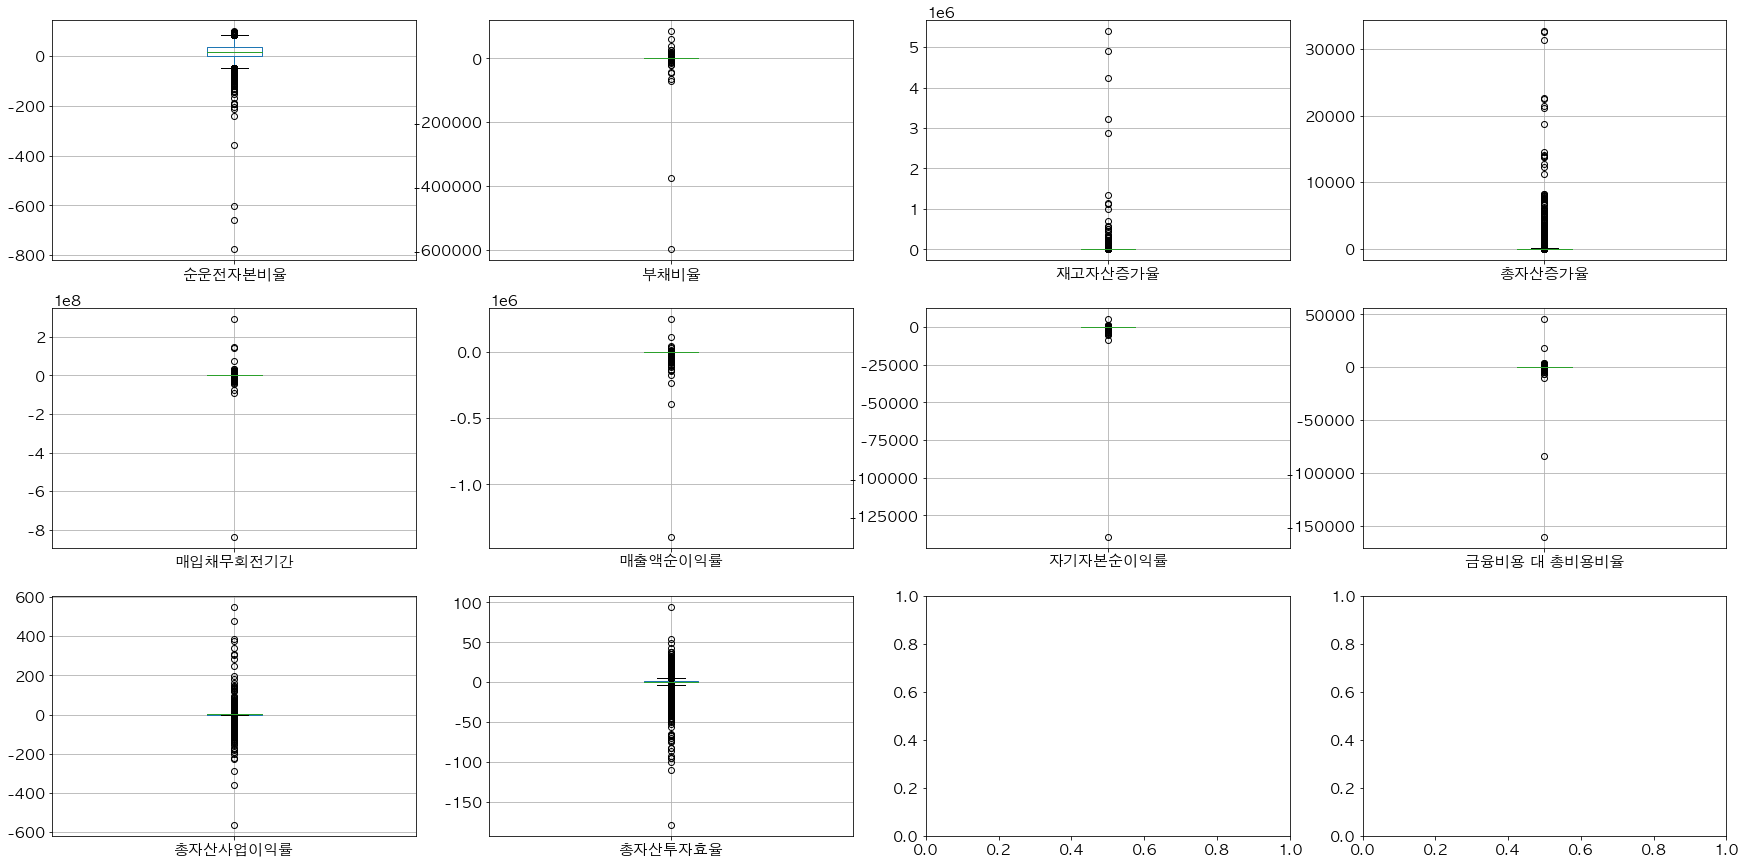

In [20]:
## boxplot
from matplotlib import rc 
col_n = 4
row_n = 3

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))

for i,col in enumerate(df.select_dtypes([np.number]).drop(columns=['거래소코드']).columns):
    df.select_dtypes([np.number]).drop(columns=['거래소코드']).boxplot(column=col,ax=ax[int(i/col_n),int(i%col_n)])

## 이상치 절삭

In [21]:
# 상단 백분위수와 하단 백분위수를 설정
upper_limit = 0.995  # 상단 0.5%를 절삭
lower_limit = 0.005  # 하단 0.5%를 절삭

# 각 변수에 대해 절삭을 적용
for col in df.select_dtypes([np.number]).drop(columns=['거래소코드']).columns:
    # 상단 백분위수를 계산하여 적용
    q_upper = df[col].quantile(upper_limit)
    df[col] = df[col].clip(upper=q_upper)
    
    # 하단 백분위수를 계산하여 적용
    q_lower = df[col].quantile(lower_limit)
    df[col] = df[col].clip(lower=q_lower)

df

,회사명,거래소코드,회계년도,순운전자본비율,부채비율,재고자산증가율,총자산증가율,매입채무회전기간,매출액순이익률,자기자본순이익률,금융비용 대 총비용비율,총자산사업이익률,총자산투자효율
0,(주)DB하이텍,990,2011/03,-10.91166,275.33403,0.00000,0.00000,89.36075,-1.52590,-0.62172,10.05993,-0.16564,0.30114
1,(주)DB하이텍,990,2012/03,-17.62292,328.98091,-0.05066,-11.89314,77.26387,-11.42651,-5.85583,10.16174,-1.36506,-0.53096
2,(주)DB하이텍,990,2013/03,-32.42699,337.04904,6.86824,-4.01134,96.24913,-24.15747,-11.15513,12.57075,-2.55238,-0.64529
3,(주)DB하이텍,990,2014/03,-24.52317,473.23235,-3.06401,-8.92399,140.97373,-19.60063,-12.75209,15.71613,-2.22459,0.07944
4,(주)DB하이텍,990,2015/03,-10.86631,438.64186,-2.94434,-5.74457,146.04364,42.07079,24.99007,13.48215,6.21551,1.86893
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81136,흥구석유(주),24060,2018-12-01,11.58551,6.76150,-46.08128,-5.88898,0.02967,3.31889,1.95761,0.00494,1.83363,1.38287
81137,흥구석유(주),24060,2019-12-01,21.46759,8.64924,96.43338,11.24245,0.09097,2.00722,1.06103,0.00000,0.97656,0.03586
81138,흥구석유(주),24060,2020-12-01,30.08684,5.17714,-18.63652,0.07172,0.17201,12.99276,4.98116,0.00000,4.73597,-0.24128
81139,흥구석유(주),24060,2021-12-01,28.57091,4.75436,16.16842,-1.28283,0.14003,2.17967,0.96963,0.00000,0.92562,0.61950


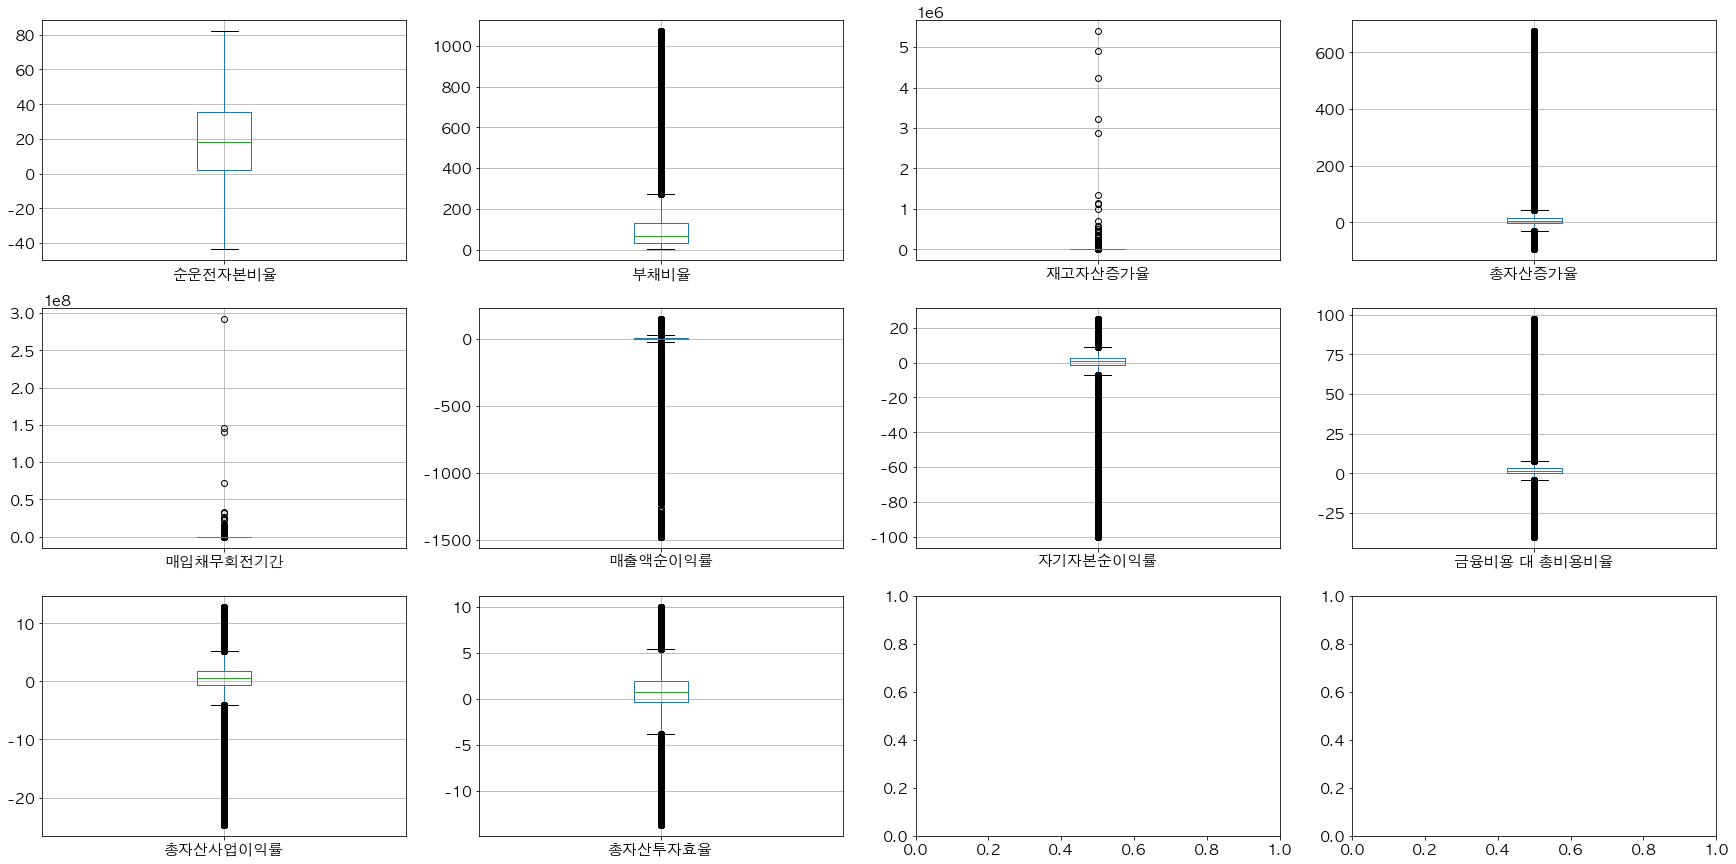

In [22]:
## boxplot
from matplotlib import rc 
col_n = 4
row_n = 3

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))

for i,col in enumerate(df.select_dtypes([np.number]).drop(columns=['거래소코드']).columns):
    df.select_dtypes([np.number]).drop(columns=['거래소코드']).boxplot(column=col,ax=ax[int(i/col_n),int(i%col_n)])

In [23]:
df.describe()

,거래소코드,순운전자본비율,부채비율,재고자산증가율,총자산증가율,매입채무회전기간,매출액순이익률,자기자본순이익률,금융비용 대 총비용비율,총자산사업이익률,총자산투자효율
count,80824.00000,80824.00000,80824.00000,76559.00000,80824.00000,78804.00000,80822.00000,80824.00000,80821.00000,80824.00000,80824.00000
mean,71194.20667,19.15599,103.84723,inf,12.18435,inf,-16.36514,-0.66952,3.31387,0.14549,0.68220
std,74488.78186,24.30970,128.02036,NaN,69.75124,NaN,131.41152,11.15412,10.78845,3.89922,2.85607
min,20.00000,-43.54494,2.45828,-100.00000,-95.26276,-574150.86641,-1476.99520,-100.12262,-40.17004,-24.70210,-13.66582
25%,14130.00000,1.93396,31.81599,-15.36532,-4.02966,75.01742,-3.81942,-1.14655,0.28701,-0.60772,-0.31614
50%,49430.00000,17.98331,68.73523,4.53398,4.07018,154.84380,2.36573,1.04798,1.25690,0.59507,0.79693
75%,95570.00000,35.48841,129.20881,30.33927,14.56723,372.69626,8.11570,2.92903,3.26033,1.74483,2.00917
max,441270.00000,81.99560,1070.65131,inf,674.03678,inf,146.96824,24.99007,97.32522,12.82854,10.02401


In [24]:
# 점수판 만들기
score = df.copy()

In [25]:
score.describe()

,거래소코드,순운전자본비율,부채비율,재고자산증가율,총자산증가율,매입채무회전기간,매출액순이익률,자기자본순이익률,금융비용 대 총비용비율,총자산사업이익률,총자산투자효율
count,80824.00000,80824.00000,80824.00000,76559.00000,80824.00000,78804.00000,80822.00000,80824.00000,80821.00000,80824.00000,80824.00000
mean,71194.20667,19.15599,103.84723,inf,12.18435,inf,-16.36514,-0.66952,3.31387,0.14549,0.68220
std,74488.78186,24.30970,128.02036,NaN,69.75124,NaN,131.41152,11.15412,10.78845,3.89922,2.85607
min,20.00000,-43.54494,2.45828,-100.00000,-95.26276,-574150.86641,-1476.99520,-100.12262,-40.17004,-24.70210,-13.66582
25%,14130.00000,1.93396,31.81599,-15.36532,-4.02966,75.01742,-3.81942,-1.14655,0.28701,-0.60772,-0.31614
50%,49430.00000,17.98331,68.73523,4.53398,4.07018,154.84380,2.36573,1.04798,1.25690,0.59507,0.79693
75%,95570.00000,35.48841,129.20881,30.33927,14.56723,372.69626,8.11570,2.92903,3.26033,1.74483,2.00917
max,441270.00000,81.99560,1070.65131,inf,674.03678,inf,146.96824,24.99007,97.32522,12.82854,10.02401


## 순운전자본비율 10%마다 점수 부여
- 높을수록 긍정인 지표이므로, 위험지수에서는 반대 점수 부여 (낮은 값 => 위험 높은 점수, 높은 값 => 위험 낮은 점수)

In [26]:
# 각 퍼센티지에 해당하는 순운전자본비율 계산
quantile_10 = score['순운전자본비율'].quantile(0.1)
quantile_20 = score['순운전자본비율'].quantile(0.2)
quantile_30 = score['순운전자본비율'].quantile(0.3)
quantile_40 = score['순운전자본비율'].quantile(0.4)
quantile_50 = score['순운전자본비율'].quantile(0.5)
quantile_60 = score['순운전자본비율'].quantile(0.6)
quantile_70 = score['순운전자본비율'].quantile(0.7)
quantile_80 = score['순운전자본비율'].quantile(0.8)
quantile_90 = score['순운전자본비율'].quantile(0.9)

# 점수 부여
score['순운전자본비율점수'] = 0  # 초기화
score.loc[score['순운전자본비율'] <= quantile_10, '순운전자본비율점수'] = 10
score.loc[(score['순운전자본비율'] > quantile_10) & (score['순운전자본비율'] <= quantile_20), '순운전자본비율점수'] = 9
score.loc[(score['순운전자본비율'] > quantile_20) & (score['순운전자본비율'] <= quantile_30), '순운전자본비율점수'] = 8
score.loc[(score['순운전자본비율'] > quantile_30) & (score['순운전자본비율'] <= quantile_40), '순운전자본비율점수'] = 7
score.loc[(score['순운전자본비율'] > quantile_40) & (score['순운전자본비율'] <= quantile_50), '순운전자본비율점수'] = 6
score.loc[(score['순운전자본비율'] > quantile_50) & (score['순운전자본비율'] <= quantile_60), '순운전자본비율점수'] = 5
score.loc[(score['순운전자본비율'] > quantile_60) & (score['순운전자본비율'] <= quantile_70), '순운전자본비율점수'] = 4
score.loc[(score['순운전자본비율'] > quantile_70) & (score['순운전자본비율'] <= quantile_80), '순운전자본비율점수'] = 3
score.loc[(score['순운전자본비율'] > quantile_80) & (score['순운전자본비율'] <= quantile_90), '순운전자본비율점수'] = 2
score.loc[score['순운전자본비율'] > quantile_90, '순운전자본비율점수'] = 1

In [27]:
score['순운전자본비율점수'].value_counts()

순운전자본비율점수
10    8083
7     8083
1     8083
4     8083
9     8082
8     8082
5     8082
3     8082
6     8082
2     8082
Name: count, dtype: int64

In [28]:
score['순운전자본비율점수'].isna().sum()

0

## 부채비율 10%마다 점수 부여
- 높을수록 부정인 지표이므로, 위험지수에서는 높은 점수 부여

In [29]:
# 각 퍼센티지에 해당하는 부채비율 계산
quantile_10 = score['부채비율'].quantile(0.1)
quantile_20 = score['부채비율'].quantile(0.2)
quantile_30 = score['부채비율'].quantile(0.3)
quantile_40 = score['부채비율'].quantile(0.4)
quantile_50 = score['부채비율'].quantile(0.5)
quantile_60 = score['부채비율'].quantile(0.6)
quantile_70 = score['부채비율'].quantile(0.7)
quantile_80 = score['부채비율'].quantile(0.8)
quantile_90 = score['부채비율'].quantile(0.9)

# 점수 부여
score['부채비율점수'] = 0  # 초기화
score.loc[score['부채비율'] <= quantile_10, '부채비율점수'] = 1
score.loc[(score['부채비율'] > quantile_10) & (score['부채비율'] <= quantile_20), '부채비율점수'] = 2
score.loc[(score['부채비율'] > quantile_20) & (score['부채비율'] <= quantile_30), '부채비율점수'] = 3
score.loc[(score['부채비율'] > quantile_30) & (score['부채비율'] <= quantile_40), '부채비율점수'] = 4
score.loc[(score['부채비율'] > quantile_40) & (score['부채비율'] <= quantile_50), '부채비율점수'] = 5
score.loc[(score['부채비율'] > quantile_50) & (score['부채비율'] <= quantile_60), '부채비율점수'] = 6
score.loc[(score['부채비율'] > quantile_60) & (score['부채비율'] <= quantile_70), '부채비율점수'] = 7
score.loc[(score['부채비율'] > quantile_70) & (score['부채비율'] <= quantile_80), '부채비율점수'] = 8
score.loc[(score['부채비율'] > quantile_80) & (score['부채비율'] <= quantile_90), '부채비율점수'] = 9
score.loc[score['부채비율'] > quantile_90, '부채비율점수'] = 10

In [30]:
score['부채비율점수'].value_counts()

부채비율점수
10    8083
7     8083
4     8083
1     8083
9     8082
8     8082
5     8082
3     8082
6     8082
2     8082
Name: count, dtype: int64

In [31]:
score['부채비율점수'].isna().sum()

0

## 재고자산증가율 10%마다 점수 부여
- 높을수록 부정인 지표이므로, 위험지수에서는 높은 점수 부여

In [32]:
# inf 값을 제외한 최대값과 최소값 구하기
filtered_score = score.replace([np.inf, -np.inf], np.nan).dropna(subset=['재고자산증가율'])
max_value = filtered_score['재고자산증가율'].max()
min_value = filtered_score['재고자산증가율'].min()

In [33]:
# 각 퍼센티지에 해당하는 재고자산증가율 계산
quantile_10 = score['재고자산증가율'].quantile(0.1)
quantile_20 = score['재고자산증가율'].quantile(0.2)
quantile_30 = score['재고자산증가율'].quantile(0.3)
quantile_40 = score['재고자산증가율'].quantile(0.4)
quantile_50 = score['재고자산증가율'].quantile(0.5)
quantile_60 = score['재고자산증가율'].quantile(0.6)
quantile_70 = score['재고자산증가율'].quantile(0.7)
quantile_80 = score['재고자산증가율'].quantile(0.8)
quantile_90 = score['재고자산증가율'].quantile(0.9)

score['재고자산증가율점수'] = pd.cut(score['재고자산증가율'], bins=[min_value, quantile_10, quantile_20, quantile_30, quantile_40,
                                                 quantile_50, quantile_60, quantile_70, quantile_80, quantile_90,
                                                 max_value],
                      labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [34]:
score['재고자산증가율점수'].value_counts()

재고자산증가율점수
2     7656
3     7656
4     7656
5     7656
7     7656
8     7656
9     7656
6     7655
1     6441
10    6432
Name: count, dtype: int64

In [35]:
score['재고자산증가율점수'].isna().sum()

6704

## 총자산증가율 10%마다 점수 부여
- 높을수록 긍정인 지표이므로, 위험지수에서는 반대 점수 부여 (낮은 값 => 위험 높은 점수, 높은 값 => 위험 낮은 점수)

In [36]:
# 각 퍼센티지에 해당하는 총자산증가율 계산
quantile_10 = score['총자산증가율'].quantile(0.1)
quantile_20 = score['총자산증가율'].quantile(0.2)
quantile_30 = score['총자산증가율'].quantile(0.3)
quantile_40 = score['총자산증가율'].quantile(0.4)
quantile_50 = score['총자산증가율'].quantile(0.5)
quantile_60 = score['총자산증가율'].quantile(0.6)
quantile_70 = score['총자산증가율'].quantile(0.7)
quantile_80 = score['총자산증가율'].quantile(0.8)
quantile_90 = score['총자산증가율'].quantile(0.9)

# 점수 부여
score['총자산증가율점수'] = 0  # 초기화
score.loc[score['총자산증가율'] <= quantile_10, '총자산증가율점수'] = 10
score.loc[(score['총자산증가율'] > quantile_10) & (score['총자산증가율'] <= quantile_20), '총자산증가율점수'] = 9
score.loc[(score['총자산증가율'] > quantile_20) & (score['총자산증가율'] <= quantile_30), '총자산증가율점수'] = 8
score.loc[(score['총자산증가율'] > quantile_30) & (score['총자산증가율'] <= quantile_40), '총자산증가율점수'] = 7
score.loc[(score['총자산증가율'] > quantile_40) & (score['총자산증가율'] <= quantile_50), '총자산증가율점수'] = 6
score.loc[(score['총자산증가율'] > quantile_50) & (score['총자산증가율'] <= quantile_60), '총자산증가율점수'] = 5
score.loc[(score['총자산증가율'] > quantile_60) & (score['총자산증가율'] <= quantile_70), '총자산증가율점수'] = 4
score.loc[(score['총자산증가율'] > quantile_70) & (score['총자산증가율'] <= quantile_80), '총자산증가율점수'] = 3
score.loc[(score['총자산증가율'] > quantile_80) & (score['총자산증가율'] <= quantile_90), '총자산증가율점수'] = 2
score.loc[score['총자산증가율'] > quantile_90, '총자산증가율점수'] = 1

In [37]:
score['총자산증가율점수'].value_counts()

총자산증가율점수
7     8083
1     8083
10    8083
4     8083
9     8082
8     8082
6     8082
5     8082
3     8082
2     8082
Name: count, dtype: int64

In [38]:
score['총자산증가율점수'].isna().sum()

0

## 매입채무회전기간 10%마다 점수 부여
- 높을수록 부정인 지표이므로, 위험지수에서는 높은 점수 부여

In [39]:
# inf 값을 제외한 최대값과 최소값 구하기
filtered_score = score.replace([np.inf, -np.inf], np.nan).dropna(subset=['매입채무회전기간'])
max_value = filtered_score['매입채무회전기간'].max()
min_value = filtered_score['매입채무회전기간'].min()

In [40]:
# 각 퍼센티지에 해당하는 매입채무회전기간 계산
quantile_10 = score['매입채무회전기간'].quantile(0.1)
quantile_20 = score['매입채무회전기간'].quantile(0.2)
quantile_30 = score['매입채무회전기간'].quantile(0.3)
quantile_40 = score['매입채무회전기간'].quantile(0.4)
quantile_50 = score['매입채무회전기간'].quantile(0.5)
quantile_60 = score['매입채무회전기간'].quantile(0.6)
quantile_70 = score['매입채무회전기간'].quantile(0.7)
quantile_80 = score['매입채무회전기간'].quantile(0.8)
quantile_90 = score['매입채무회전기간'].quantile(0.9)

score['매입채무회전기간점수'] = pd.cut(score['매입채무회전기간'], bins=[min_value, quantile_10, quantile_20, quantile_30, quantile_40,
                                                 quantile_50, quantile_60, quantile_70, quantile_80, quantile_90,
                                                 max_value],
                      labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [41]:
score['매입채무회전기간점수'].value_counts()

매입채무회전기간점수
4     7881
7     7881
2     7880
3     7880
5     7880
6     7880
8     7880
9     7880
1     7486
10    6303
Name: count, dtype: int64

In [42]:
score['매입채무회전기간점수'].isna().sum()

3993

## 매출액순이익률 10%마다 점수 부여
- 높을수록 긍정인 지표이므로, 위험지수에서는 반대 점수 부여 (낮은 값 => 위험 높은 점수, 높은 값 => 위험 낮은 점수)

In [43]:
# 각 퍼센티지에 해당하는 매출액순이익률 계산
quantile_10 = score['매출액순이익률'].quantile(0.1)
quantile_20 = score['매출액순이익률'].quantile(0.2)
quantile_30 = score['매출액순이익률'].quantile(0.3)
quantile_40 = score['매출액순이익률'].quantile(0.4)
quantile_50 = score['매출액순이익률'].quantile(0.5)
quantile_60 = score['매출액순이익률'].quantile(0.6)
quantile_70 = score['매출액순이익률'].quantile(0.7)
quantile_80 = score['매출액순이익률'].quantile(0.8)
quantile_90 = score['매출액순이익률'].quantile(0.9)

# 점수 부여
score['매출액순이익률점수'] = 0  # 초기화
score.loc[score['매출액순이익률'] <= quantile_10, '매출액순이익률점수'] = 10
score.loc[(score['매출액순이익률'] > quantile_10) & (score['매출액순이익률'] <= quantile_20), '매출액순이익률점수'] = 9
score.loc[(score['매출액순이익률'] > quantile_20) & (score['매출액순이익률'] <= quantile_30), '매출액순이익률점수'] = 8
score.loc[(score['매출액순이익률'] > quantile_30) & (score['매출액순이익률'] <= quantile_40), '매출액순이익률점수'] = 7
score.loc[(score['매출액순이익률'] > quantile_40) & (score['매출액순이익률'] <= quantile_50), '매출액순이익률점수'] = 6
score.loc[(score['매출액순이익률'] > quantile_50) & (score['매출액순이익률'] <= quantile_60), '매출액순이익률점수'] = 5
score.loc[(score['매출액순이익률'] > quantile_60) & (score['매출액순이익률'] <= quantile_70), '매출액순이익률점수'] = 4
score.loc[(score['매출액순이익률'] > quantile_70) & (score['매출액순이익률'] <= quantile_80), '매출액순이익률점수'] = 3
score.loc[(score['매출액순이익률'] > quantile_80) & (score['매출액순이익률'] <= quantile_90), '매출액순이익률점수'] = 2
score.loc[score['매출액순이익률'] > quantile_90, '매출액순이익률점수'] = 1

In [44]:
score['매출액순이익률점수'].value_counts()

매출액순이익률점수
1     8083
10    8083
7     8082
9     8082
2     8082
6     8082
3     8082
4     8082
8     8082
5     8082
0        2
Name: count, dtype: int64

In [45]:
score['매출액순이익률점수'].isna().sum()

0

## 자기자본순이익률 10%마다 점수 부여
- 높을수록 긍정인 지표이므로, 위험지수에서는 반대 점수 부여 (낮은 값 => 위험 높은 점수, 높은 값 => 위험 낮은 점수)

In [46]:
# 각 퍼센티지에 해당하는 자기자본순이익률 계산
quantile_10 = score['자기자본순이익률'].quantile(0.1)
quantile_20 = score['자기자본순이익률'].quantile(0.2)
quantile_30 = score['자기자본순이익률'].quantile(0.3)
quantile_40 = score['자기자본순이익률'].quantile(0.4)
quantile_50 = score['자기자본순이익률'].quantile(0.5)
quantile_60 = score['자기자본순이익률'].quantile(0.6)
quantile_70 = score['자기자본순이익률'].quantile(0.7)
quantile_80 = score['자기자본순이익률'].quantile(0.8)
quantile_90 = score['자기자본순이익률'].quantile(0.9)

# 점수 부여
score['자기자본순이익률점수'] = 0  # 초기화
score.loc[score['자기자본순이익률'] <= quantile_10, '자기자본순이익률점수'] = 10
score.loc[(score['자기자본순이익률'] > quantile_10) & (score['자기자본순이익률'] <= quantile_20), '자기자본순이익률점수'] = 9
score.loc[(score['자기자본순이익률'] > quantile_20) & (score['자기자본순이익률'] <= quantile_30), '자기자본순이익률점수'] = 8
score.loc[(score['자기자본순이익률'] > quantile_30) & (score['자기자본순이익률'] <= quantile_40), '자기자본순이익률점수'] = 7
score.loc[(score['자기자본순이익률'] > quantile_40) & (score['자기자본순이익률'] <= quantile_50), '자기자본순이익률점수'] = 6
score.loc[(score['자기자본순이익률'] > quantile_50) & (score['자기자본순이익률'] <= quantile_60), '자기자본순이익률점수'] = 5
score.loc[(score['자기자본순이익률'] > quantile_60) & (score['자기자본순이익률'] <= quantile_70), '자기자본순이익률점수'] = 4
score.loc[(score['자기자본순이익률'] > quantile_70) & (score['자기자본순이익률'] <= quantile_80), '자기자본순이익률점수'] = 3
score.loc[(score['자기자본순이익률'] > quantile_80) & (score['자기자본순이익률'] <= quantile_90), '자기자본순이익률점수'] = 2
score.loc[score['자기자본순이익률'] > quantile_90, '자기자본순이익률점수'] = 1

In [47]:
score['자기자본순이익률점수'].value_counts()

자기자본순이익률점수
10    8083
1     8083
4     8083
7     8083
8     8082
9     8082
6     8082
3     8082
2     8082
5     8082
Name: count, dtype: int64

In [48]:
score['자기자본순이익률점수'].isna().sum()

0

## 금융비용 대 총비용비율 10%마다 점수 부여
- 높을수록 부정인 지표이므로, 위험지수에서는 높은 점수 부여

In [49]:
# 각 퍼센티지에 해당하는 금융비용 대 총비용비율 계산
quantile_10 = score['금융비용 대 총비용비율'].quantile(0.1)
quantile_20 = score['금융비용 대 총비용비율'].quantile(0.2)
quantile_30 = score['금융비용 대 총비용비율'].quantile(0.3)
quantile_40 = score['금융비용 대 총비용비율'].quantile(0.4)
quantile_50 = score['금융비용 대 총비용비율'].quantile(0.5)
quantile_60 = score['금융비용 대 총비용비율'].quantile(0.6)
quantile_70 = score['금융비용 대 총비용비율'].quantile(0.7)
quantile_80 = score['금융비용 대 총비용비율'].quantile(0.8)
quantile_90 = score['금융비용 대 총비용비율'].quantile(0.9)

# 점수 부여
score['금융비용 대 총비용비율점수'] = 0  # 초기화
score.loc[score['금융비용 대 총비용비율'] <= quantile_10, '금융비용 대 총비용비율점수'] = 1
score.loc[(score['금융비용 대 총비용비율'] > quantile_10) & (score['금융비용 대 총비용비율'] <= quantile_20), '금융비용 대 총비용비율점수'] = 2
score.loc[(score['금융비용 대 총비용비율'] > quantile_20) & (score['금융비용 대 총비용비율'] <= quantile_30), '금융비용 대 총비용비율점수'] = 3
score.loc[(score['금융비용 대 총비용비율'] > quantile_30) & (score['금융비용 대 총비용비율'] <= quantile_40), '금융비용 대 총비용비율점수'] = 4
score.loc[(score['금융비용 대 총비용비율'] > quantile_40) & (score['금융비용 대 총비용비율'] <= quantile_50), '금융비용 대 총비용비율점수'] = 5
score.loc[(score['금융비용 대 총비용비율'] > quantile_50) & (score['금융비용 대 총비용비율'] <= quantile_60), '금융비용 대 총비용비율점수'] = 6
score.loc[(score['금융비용 대 총비용비율'] > quantile_60) & (score['금융비용 대 총비용비율'] <= quantile_70), '금융비용 대 총비용비율점수'] = 7
score.loc[(score['금융비용 대 총비용비율'] > quantile_70) & (score['금융비용 대 총비용비율'] <= quantile_80), '금융비용 대 총비용비율점수'] = 8
score.loc[(score['금융비용 대 총비용비율'] > quantile_80) & (score['금융비용 대 총비용비율'] <= quantile_90), '금융비용 대 총비용비율점수'] = 9
score.loc[score['금융비용 대 총비용비율'] > quantile_90, '금융비용 대 총비용비율점수'] = 10

In [50]:
score['금융비용 대 총비용비율점수'].value_counts()

금융비용 대 총비용비율점수
1     10107
10     8082
9      8082
8      8082
5      8082
4      8082
7      8082
6      8082
3      8082
2      6058
0         3
Name: count, dtype: int64

In [51]:
score['금융비용 대 총비용비율점수'].isna().sum()

0

## 총자산사업이익률 10%마다 점수 부여
- 높을수록 긍정인 지표이므로, 위험지수에서는 반대 점수 부여 (낮은 값 => 위험 높은 점수, 높은 값 => 위험 낮은 점수)

In [52]:
# 각 퍼센티지에 해당하는 총자산사업이익률 계산
quantile_10 = score['총자산사업이익률'].quantile(0.1)
quantile_20 = score['총자산사업이익률'].quantile(0.2)
quantile_30 = score['총자산사업이익률'].quantile(0.3)
quantile_40 = score['총자산사업이익률'].quantile(0.4)
quantile_50 = score['총자산사업이익률'].quantile(0.5)
quantile_60 = score['총자산사업이익률'].quantile(0.6)
quantile_70 = score['총자산사업이익률'].quantile(0.7)
quantile_80 = score['총자산사업이익률'].quantile(0.8)
quantile_90 = score['총자산사업이익률'].quantile(0.9)

# 점수 부여
score['총자산사업이익률점수'] = 0  # 초기화
score.loc[score['총자산사업이익률'] <= quantile_10, '총자산사업이익률점수'] = 10
score.loc[(score['총자산사업이익률'] > quantile_10) & (score['총자산사업이익률'] <= quantile_20), '총자산사업이익률점수'] = 9
score.loc[(score['총자산사업이익률'] > quantile_20) & (score['총자산사업이익률'] <= quantile_30), '총자산사업이익률점수'] = 8
score.loc[(score['총자산사업이익률'] > quantile_30) & (score['총자산사업이익률'] <= quantile_40), '총자산사업이익률점수'] = 7
score.loc[(score['총자산사업이익률'] > quantile_40) & (score['총자산사업이익률'] <= quantile_50), '총자산사업이익률점수'] = 6
score.loc[(score['총자산사업이익률'] > quantile_50) & (score['총자산사업이익률'] <= quantile_60), '총자산사업이익률점수'] = 5
score.loc[(score['총자산사업이익률'] > quantile_60) & (score['총자산사업이익률'] <= quantile_70), '총자산사업이익률점수'] = 4
score.loc[(score['총자산사업이익률'] > quantile_70) & (score['총자산사업이익률'] <= quantile_80), '총자산사업이익률점수'] = 3
score.loc[(score['총자산사업이익률'] > quantile_80) & (score['총자산사업이익률'] <= quantile_90), '총자산사업이익률점수'] = 2
score.loc[score['총자산사업이익률'] > quantile_90, '총자산사업이익률점수'] = 1

In [53]:
score['총자산사업이익률점수'].value_counts()

총자산사업이익률점수
7     8083
1     8083
10    8083
4     8083
9     8082
2     8082
3     8082
6     8082
8     8082
5     8082
Name: count, dtype: int64

In [54]:
score['총자산사업이익률점수'].isna().sum()

0

## 총자산투자효율 10%마다 점수 부여
- 높을수록 긍정인 지표이므로, 위험지수에서는 반대 점수 부여 (낮은 값 => 위험 높은 점수, 높은 값 => 위험 낮은 점수)

In [55]:
# 각 퍼센티지에 해당하는 총자산투자효율 계산
quantile_10 = score['총자산투자효율'].quantile(0.1)
quantile_20 = score['총자산투자효율'].quantile(0.2)
quantile_30 = score['총자산투자효율'].quantile(0.3)
quantile_40 = score['총자산투자효율'].quantile(0.4)
quantile_50 = score['총자산투자효율'].quantile(0.5)
quantile_60 = score['총자산투자효율'].quantile(0.6)
quantile_70 = score['총자산투자효율'].quantile(0.7)
quantile_80 = score['총자산투자효율'].quantile(0.8)
quantile_90 = score['총자산투자효율'].quantile(0.9)

# 점수 부여
score['총자산투자효율점수'] = 0  # 초기화
score.loc[score['총자산투자효율'] <= quantile_10, '총자산투자효율점수'] = 10
score.loc[(score['총자산투자효율'] > quantile_10) & (score['총자산투자효율'] <= quantile_20), '총자산투자효율점수'] = 9
score.loc[(score['총자산투자효율'] > quantile_20) & (score['총자산투자효율'] <= quantile_30), '총자산투자효율점수'] = 8
score.loc[(score['총자산투자효율'] > quantile_30) & (score['총자산투자효율'] <= quantile_40), '총자산투자효율점수'] = 7
score.loc[(score['총자산투자효율'] > quantile_40) & (score['총자산투자효율'] <= quantile_50), '총자산투자효율점수'] = 6
score.loc[(score['총자산투자효율'] > quantile_50) & (score['총자산투자효율'] <= quantile_60), '총자산투자효율점수'] = 5
score.loc[(score['총자산투자효율'] > quantile_60) & (score['총자산투자효율'] <= quantile_70), '총자산투자효율점수'] = 4
score.loc[(score['총자산투자효율'] > quantile_70) & (score['총자산투자효율'] <= quantile_80), '총자산투자효율점수'] = 3
score.loc[(score['총자산투자효율'] > quantile_80) & (score['총자산투자효율'] <= quantile_90), '총자산투자효율점수'] = 2
score.loc[score['총자산투자효율'] > quantile_90, '총자산투자효율점수'] = 1

In [56]:
score['총자산투자효율점수'].value_counts()

총자산투자효율점수
8     8090
1     8083
4     8083
10    8083
3     8082
6     8082
5     8082
9     8082
2     8082
7     8075
Name: count, dtype: int64

In [57]:
score['총자산투자효율점수'].isna().sum()

0

In [58]:
score.drop(columns = ['순운전자본비율', '부채비율', '재고자산증가율', '총자산증가율',
       '매입채무회전기간', '매출액순이익률', '자기자본순이익률', '금융비용 대 총비용비율', '총자산사업이익률',
       '총자산투자효율'], inplace = True)

In [59]:
score

,회사명,거래소코드,회계년도,순운전자본비율점수,부채비율점수,재고자산증가율점수,총자산증가율점수,매입채무회전기간점수,매출액순이익률점수,자기자본순이익률점수,금융비용 대 총비용비율점수,총자산사업이익률점수,총자산투자효율점수
0,(주)DB하이텍,990,2011/03,9,10,5,7,3,7,8,10,7,7
1,(주)DB하이텍,990,2012/03,10,10,5,9,3,9,9,10,9,8
2,(주)DB하이텍,990,2013/03,10,10,6,8,4,9,10,10,9,8
3,(주)DB하이텍,990,2014/03,10,10,4,9,5,9,10,10,9,7
4,(주)DB하이텍,990,2015/03,9,10,4,8,5,1,1,10,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81136,흥구석유(주),24060,2018-12-01,7,1,2,8,1,5,4,2,3,4
81137,흥구석유(주),24060,2019-12-01,5,1,9,4,1,6,5,1,5,7
81138,흥구석유(주),24060,2020-12-01,4,1,3,7,1,2,2,1,1,8
81139,흥구석유(주),24060,2021-12-01,4,1,7,7,1,6,6,1,5,6


In [60]:
score.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80824 entries, 0 to 81140
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   회사명             80824 non-null  object  
 1   거래소코드           80824 non-null  int64   
 2   회계년도            80824 non-null  object  
 3   순운전자본비율점수       80824 non-null  int64   
 4   부채비율점수          80824 non-null  int64   
 5   재고자산증가율점수       74120 non-null  category
 6   총자산증가율점수        80824 non-null  int64   
 7   매입채무회전기간점수      76831 non-null  category
 8   매출액순이익률점수       80824 non-null  int64   
 9   자기자본순이익률점수      80824 non-null  int64   
 10  금융비용 대 총비용비율점수  80824 non-null  int64   
 11  총자산사업이익률점수      80824 non-null  int64   
 12  총자산투자효율점수       80824 non-null  int64   
dtypes: category(2), int64(9), object(2)
memory usage: 7.6+ MB


In [61]:
# 결측치 0값으로 대체
score['재고자산증가율점수'] = score['재고자산증가율점수'].cat.add_categories([0])
score['재고자산증가율점수'] = score['재고자산증가율점수'].fillna(0)

score['매입채무회전기간점수'] = score['매입채무회전기간점수'].cat.add_categories([0])
score['매입채무회전기간점수'] = score['매입채무회전기간점수'].fillna(0)

In [62]:
# 타입 변환
score['재고자산증가율점수'] = score['재고자산증가율점수'].astype(int)
score['매입채무회전기간점수'] = score['매입채무회전기간점수'].astype(int)

---

## 피처별 부실요인 영향도의 차이를 고려 : 피쳐 순위 1 ~ 10
- 1순위 가중치 : 
- 10순위 가중치 : 
- 피처별 순위 : 부채비율(가중치 = 1) -> 순운전자본비율(가중치 = 0.9) -> 총자본투자효율(가중치 = 0.8) -> 총자본 ... -> 재고자산증가율(가중치 = 0.1)
### 기업 위험 지수(분기별 산정) = (각 피처 점수 * 우선순위 가중치) 합

In [63]:
score

,회사명,거래소코드,회계년도,순운전자본비율점수,부채비율점수,재고자산증가율점수,총자산증가율점수,매입채무회전기간점수,매출액순이익률점수,자기자본순이익률점수,금융비용 대 총비용비율점수,총자산사업이익률점수,총자산투자효율점수
0,(주)DB하이텍,990,2011/03,9,10,5,7,3,7,8,10,7,7
1,(주)DB하이텍,990,2012/03,10,10,5,9,3,9,9,10,9,8
2,(주)DB하이텍,990,2013/03,10,10,6,8,4,9,10,10,9,8
3,(주)DB하이텍,990,2014/03,10,10,4,9,5,9,10,10,9,7
4,(주)DB하이텍,990,2015/03,9,10,4,8,5,1,1,10,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81136,흥구석유(주),24060,2018-12-01,7,1,2,8,1,5,4,2,3,4
81137,흥구석유(주),24060,2019-12-01,5,1,9,4,1,6,5,1,5,7
81138,흥구석유(주),24060,2020-12-01,4,1,3,7,1,2,2,1,1,8
81139,흥구석유(주),24060,2021-12-01,4,1,7,7,1,6,6,1,5,6


In [64]:
# 회계년도 데이터 타입 변경
score['회계년도'] = pd.to_datetime(score['회계년도'])

In [66]:
score.describe()

,거래소코드,회계년도,순운전자본비율점수,부채비율점수,재고자산증가율점수,총자산증가율점수,매입채무회전기간점수,매출액순이익률점수,자기자본순이익률점수,금융비용 대 총비용비율점수,총자산사업이익률점수,총자산투자효율점수
count,80824.00000,80824,80824.00000,80824.00000,80824.00000,80824.00000,80824.00000,80824.00000,80824.00000,80824.00000,80824.00000,80824.00000
mean,71194.20667,2017-07-30 06:26:27.449272576,5.50000,5.50000,5.04329,5.50000,5.16241,5.49986,5.50000,5.47470,5.50000,5.50010
min,20.00000,2011-01-01 00:00:00,1.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000,1.00000
25%,14130.00000,2014-09-01 00:00:00,3.00000,3.00000,2.00000,3.00000,3.00000,3.00000,3.00000,3.00000,3.00000,3.00000
50%,49430.00000,2017-12-01 00:00:00,5.50000,5.50000,5.00000,5.50000,5.00000,5.00000,5.50000,5.00000,5.50000,5.50000
75%,95570.00000,2020-09-01 00:00:00,8.00000,8.00000,8.00000,8.00000,8.00000,8.00000,8.00000,8.00000,8.00000,8.00000
max,441270.00000,2022-12-01 00:00:00,10.00000,10.00000,10.00000,10.00000,10.00000,10.00000,10.00000,10.00000,10.00000,10.00000
std,74488.78186,NaN,2.87232,2.87232,3.08291,2.87232,2.98835,2.87245,2.87232,2.90702,2.87232,2.87239


In [69]:
round(score.drop(['거래소코드', '회계년도'], axis = 1).describe(),3)

,순운전자본비율점수,부채비율점수,재고자산증가율점수,총자산증가율점수,매입채무회전기간점수,매출액순이익률점수,자기자본순이익률점수,금융비용 대 총비용비율점수,총자산사업이익률점수,총자산투자효율점수
count,80824.00000,80824.00000,80824.00000,80824.00000,80824.00000,80824.00000,80824.00000,80824.00000,80824.00000,80824.00000
mean,5.50000,5.50000,5.04300,5.50000,5.16200,5.50000,5.50000,5.47500,5.50000,5.50000
std,2.87200,2.87200,3.08300,2.87200,2.98800,2.87200,2.87200,2.90700,2.87200,2.87200
min,1.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000,1.00000
25%,3.00000,3.00000,2.00000,3.00000,3.00000,3.00000,3.00000,3.00000,3.00000,3.00000
50%,5.50000,5.50000,5.00000,5.50000,5.00000,5.00000,5.50000,5.00000,5.50000,5.50000
75%,8.00000,8.00000,8.00000,8.00000,8.00000,8.00000,8.00000,8.00000,8.00000,8.00000
max,10.00000,10.00000,10.00000,10.00000,10.00000,10.00000,10.00000,10.00000,10.00000,10.00000


In [108]:
score.to_csv('./펀드 점수.csv', index = False)